In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.3.0+cu121
torchvision version: 0.18.0+cu121


In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
%cd /content/drive/MyDrive/ML-DL/MLOps-Production

/content/drive/MyDrive/ML-DL/MLOps-Production


In [ ]:
!nvidia-smi

Tue Jun 25 06:54:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   42C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
os.cpu_count()

12

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
!python train.py --train_dir "train_7706_10" --test_dir "test_2294_10" --num_epochs 100 --num_workers 12

Training MobileNetv3 model with hyper-params:
cuda
Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                               [128, 3, 224, 224]   [128, 4]             --                   True
├─ConvBlock (conv)                                      [128, 3, 224, 224]   [128, 16, 112, 112]  --                   True
│    └─Conv2d (conv)                                    [128, 3, 224, 224]   [128, 16, 112, 112]  432                  True
│    └─BatchNorm2d (bn)                                 [128, 16, 112, 112]  [128, 16, 112, 112]  32                   True
│    └─Hardswish (act)                                  [128, 16, 112, 112]  [128, 16, 112, 112]  --                   --
├─ModuleList (blocks)                                   --                   --                   --                   True
│    └─BNeck (0)                                        [128, 16, 112, 112]  [

In [ ]:
!python train.py --train_dir "train_7706_10" --test_dir "test_2294_10" --architecture "Resnet" --num_epochs 50 --num_workers 12

Training Resnet model with hyper-params:
cuda
Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                                    [128, 3, 224, 224]   [128, 4]             --                   True
├─Conv2d (conv1)                                   [128, 3, 224, 224]   [128, 64, 112, 112]  9,408                True
├─BatchNorm2d (bn1)                                [128, 64, 112, 112]  [128, 64, 112, 112]  128                  True
├─ReLU (relu)                                      [128, 64, 112, 112]  [128, 64, 112, 112]  --                   --
├─MaxPool2d (maxpool)                              [128, 64, 112, 112]  [128, 64, 56, 56]    --                   --
├─Sequential (layer1)                              [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    └─Block (0)                                   [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│

In [ ]:
!python train_KD.py --train_dir "train_7706_10" --test_dir "test_2294_10" --num_epochs 50 --num_workers 12

Training KD model with hyper-params:
MobileNetV3 Large parameters (Teacher): 4,200,540
MobileNetV3 parameters (Student): 174,900
Architecture model Teacher:
Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                               [128, 3, 112, 112]   [128, 4]             --                   True
├─ConvBlock (conv)                                      [128, 3, 112, 112]   [128, 16, 56, 56]    --                   True
│    └─Conv2d (conv)                                    [128, 3, 112, 112]   [128, 16, 56, 56]    432                  True
│    └─BatchNorm2d (bn)                                 [128, 16, 56, 56]    [128, 16, 56, 56]    32                   True
│    └─Hardswish (act)                                  [128, 16, 56, 56]    [128, 16, 56, 56]    --                   --
├─ModuleList (blocks)                                   --                   --                 

In [ ]:
!pip install onnx
!pip install onnxruntime
!pip install tensorrt
!pip install pycuda

  Using cached onnx-1.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Using cached onnxruntime-1.18.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.8 MB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
  Using cached tensorrt-10.1.0.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-10.1.0-py2.py3-none-any.whl size=16332 sha256=63df62eb1ca0a68c1d323e509b646355e3c0ad5b937e4aeb1db9c54511c1940d
  Stored in directory: /root/.cache/pip/wheels/f5/55/f5/a1836546c0d92da062e9365a0323953f5e6a0a5f51d46da503
  Created wheel for tensorrt-cu12: filename=tensorrt_cu12-10.1.0-py2.py3-none-any.whl size=17554 sha256=3ddef291d59db6ac90b74ebd5cce026ce7f48260445adfd843b7710741f483c3
  Stored in directory: /root/.cache/pip/wheels/15/96/43/6559f5cfe251d64e7a7b49efb429ae5258eff95976e5f12312
Succe

In [ ]:
!python train_quant.py --train_dir "train_7706_10" --test_dir "test_2294_10" --num_epochs 50 --num_workers 12

Training MobileNetv3 model with hyper-params:
cuda
Layer (type (var_name))                                 Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                               [128, 3, 224, 224]   [128, 4]             --                   True
├─ConvBlock (conv)                                      [128, 3, 224, 224]   [128, 16, 112, 112]  --                   True
│    └─Conv2d (conv)                                    [128, 3, 224, 224]   [128, 16, 112, 112]  432                  True
│    └─BatchNorm2d (bn)                                 [128, 16, 112, 112]  [128, 16, 112, 112]  32                   True
│    └─Hardswish (act)                                  [128, 16, 112, 112]  [128, 16, 112, 112]  --                   --
├─ModuleList (blocks)                                   --                   --                   --                   True
│    └─BNeck (0)                                        [128, 16, 112, 112]  [

In [ ]:
!python export_onnx.py --train_dir "train_7706_10" --test_dir "test_2294_10" --num_workers 12

Training MobileNetv3 model with hyper-params:
cuda
State dict keys:
odict_keys(['conv.conv.weight', 'conv.bn.weight', 'conv.bn.bias', 'conv.bn.running_mean', 'conv.bn.running_var', 'conv.bn.num_batches_tracked', 'blocks.0.block.0.conv.weight', 'blocks.0.block.0.bn.weight', 'blocks.0.block.0.bn.bias', 'blocks.0.block.0.bn.running_mean', 'blocks.0.block.0.bn.running_var', 'blocks.0.block.0.bn.num_batches_tracked', 'blocks.0.block.1.conv.weight', 'blocks.0.block.1.bn.weight', 'blocks.0.block.1.bn.bias', 'blocks.0.block.1.bn.running_mean', 'blocks.0.block.1.bn.running_var', 'blocks.0.block.1.bn.num_batches_tracked', 'blocks.0.block.2.fc1.weight', 'blocks.0.block.2.fc2.weight', 'blocks.0.block.3.conv.weight', 'blocks.0.block.3.bn.weight', 'blocks.0.block.3.bn.bias', 'blocks.0.block.3.bn.running_mean', 'blocks.0.block.3.bn.running_var', 'blocks.0.block.3.bn.num_batches_tracked', 'blocks.1.block.0.conv.weight', 'blocks.1.block.0.bn.weight', 'blocks.1.block.0.bn.bias', 'blocks.1.block.0.bn.run

In [ ]:
!find / -name tensorrt

/usr/local/lib/python3.10/dist-packages/tensorrt
/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/experimental/tensorrt
/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/compat/v2/experimental/tensorrt
/usr/local/lib/python3.10/dist-packages/tensorflow/python/compiler/tensorrt
find: ‘/proc/57/task/57/net’: Invalid argument
find: ‘/proc/57/net’: Invalid argument
find: ‘/proc/1229/task/1229/net’: Invalid argument
find: ‘/proc/1229/net’: Invalid argument


In [ ]:
!apt-get install tensorrt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libnvinfer-bin libnvinfer-dev libnvinfer-dispatch-dev libnvinfer-dispatch10
  libnvinfer-headers-dev libnvinfer-headers-plugin-dev libnvinfer-lean-dev libnvinfer-lean10
  libnvinfer-plugin-dev libnvinfer-plugin10 libnvinfer-samples libnvinfer-vc-plugin-dev
  libnvinfer-vc-plugin10 libnvinfer10 libnvonnxparsers-dev libnvonnxparsers10 python3-libnvinfer
  python3-libnvinfer-dev python3-libnvinfer-dispatch python3-libnvinfer-lean
The following NEW packages will be installed:
  libnvinfer-bin libnvinfer-dev libnvinfer-dispatch-dev libnvinfer-dispatch10
  libnvinfer-headers-dev libnvinfer-headers-plugin-dev libnvinfer-lean-dev libnvinfer-lean10
  libnvinfer-plugin-dev libnvinfer-plugin10 libnvinfer-samples libnvinfer-vc-plugin-dev
  libnvinfer-vc-plugin10 libnvinfer10 libnvonnxparsers-dev libnvonnxparsers10 python3-libnvinfer
  python3-libnv

In [ ]:
!ls /usr/src/tensorrt/bin/trtexec

/usr/src/tensorrt/bin/trtexec


In [ ]:
!dpkg-query -W tensorrt

tensorrt	10.1.0.27-1+cuda12.4


In [ ]:
!/usr/src/tensorrt/bin/trtexec --onnx=models/MobileNetv3_quantized.onnx --saveEngine=models/MobileNetv3.trt

&&&& RUNNING TensorRT.trtexec [TensorRT v100100] # /usr/src/tensorrt/bin/trtexec --onnx=models/MobileNetv3_quantized.onnx --saveEngine=models/MobileNetv3.trt
[06/23/2024-10:53:21] [I] === Model Options ===
[06/23/2024-10:53:21] [I] Format: ONNX
[06/23/2024-10:53:21] [I] Model: models/MobileNetv3_quantized.onnx
[06/23/2024-10:53:21] [I] Output:
[06/23/2024-10:53:21] [I] === Build Options ===
[06/23/2024-10:53:21] [I] Memory Pools: workspace: default, dlaSRAM: default, dlaLocalDRAM: default, dlaGlobalDRAM: default, tacticSharedMem: default
[06/23/2024-10:53:21] [I] avgTiming: 8
[06/23/2024-10:53:21] [I] Precision: FP32
[06/23/2024-10:53:21] [I] LayerPrecisions: 
[06/23/2024-10:53:21] [I] Layer Device Types: 
[06/23/2024-10:53:21] [I] Calibration: 
[06/23/2024-10:53:21] [I] Refit: Disabled
[06/23/2024-10:53:21] [I] Strip weights: Disabled
[06/23/2024-10:53:21] [I] Version Compatible: Disabled
[06/23/2024-10:53:21] [I] ONNX Plugin InstanceNorm: Disabled
[06/23/2024-10:53:21] [I] TensorRT r

In [ ]:
!pip install onnxruntime opencv-python Pillow

Inference time for batch: 0.0656 seconds


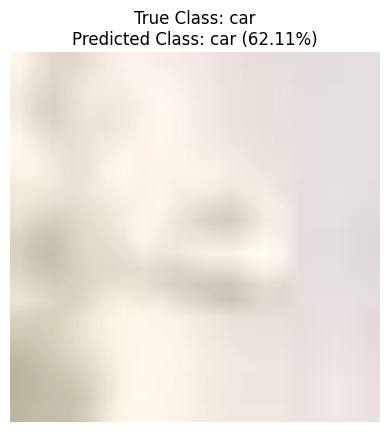

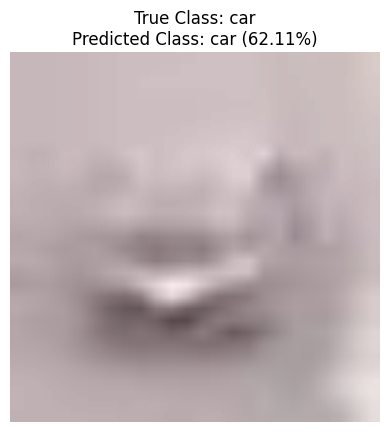

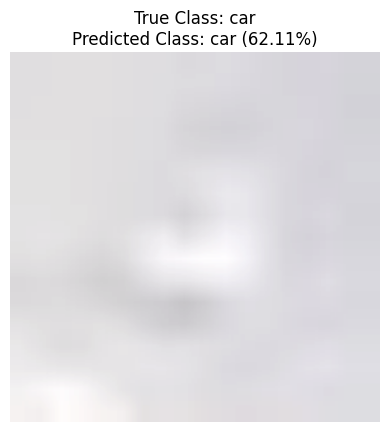

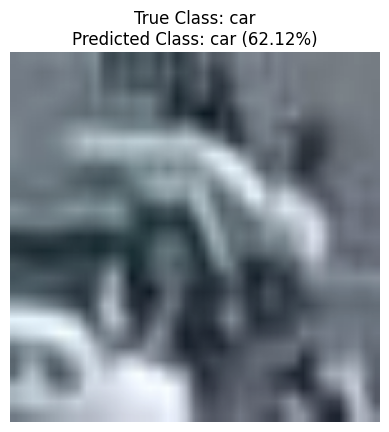

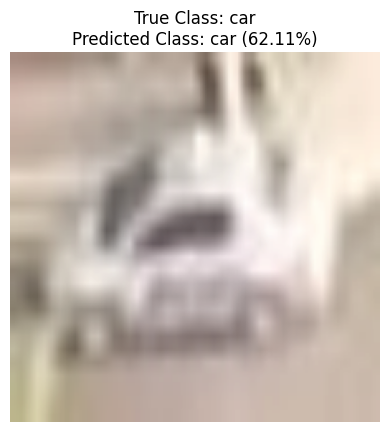

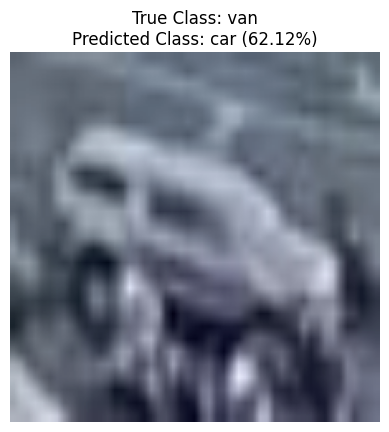

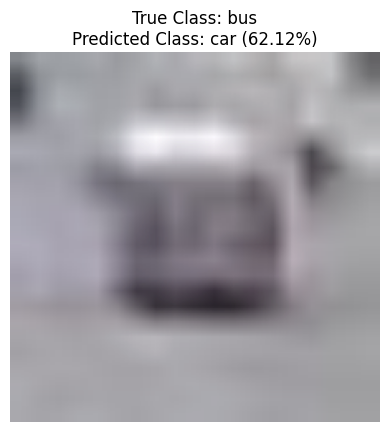

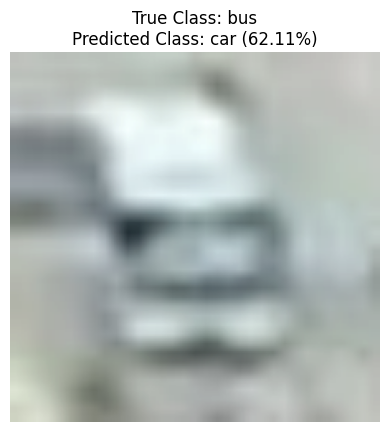

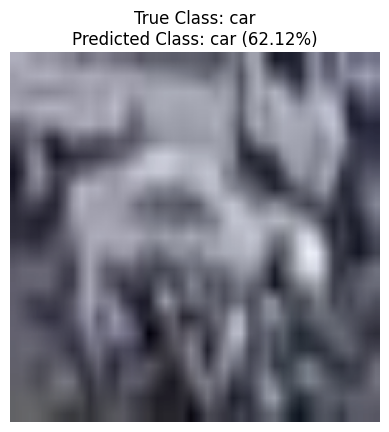

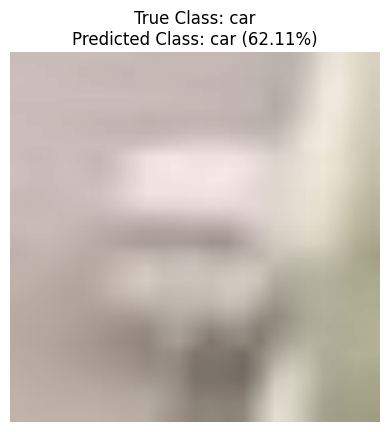

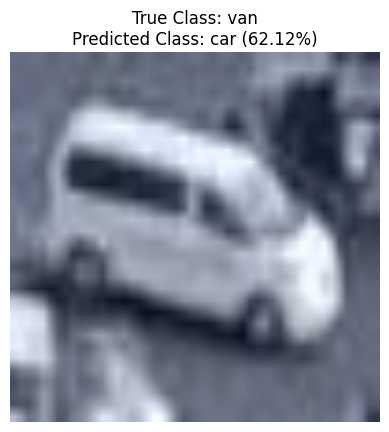

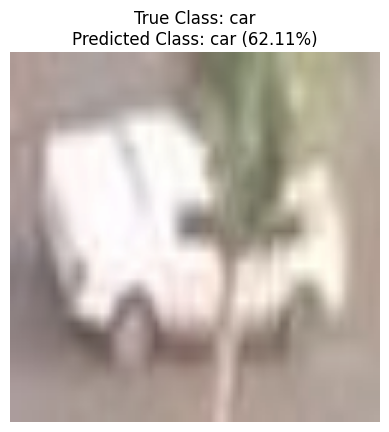

In [ ]:
import torch
from torchvision import datasets, transforms
import numpy as np
from PIL import Image
import onnxruntime
import matplotlib.pyplot as plt
import time

# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.46295794, 0.46194877, 0.4847407], std=[0.19444681, 0.19439201, 0.19383532]),
])

# Load the dataset
dataset = datasets.ImageFolder(root="test_2294_10", transform=transform)

# Create a DataLoader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=12, shuffle=True)

# Define a dictionary to map class indices to labels
class_labels = {
    0: 'bus',
    1: 'car',
    2: 'truck',
    3: 'van'
}

def load_onnx_model(model_path):
    # Load the ONNX model
    session = onnxruntime.InferenceSession(model_path)
    return session

def infer_onnx_model(session, input_data):
    # Get the names of the input and output nodes
    input_name = session.get_inputs()[0].name
    output_name = session.get_outputs()[0].name

    # Perform inference and measure the time taken
    start_time = time.time()
    results = session.run([output_name], {input_name: input_data})
    end_time = time.time()

    inference_time = end_time - start_time
    return results, inference_time

# Load the model
model_path = "models/MobileNetv3_quantized.onnx"
session = load_onnx_model(model_path)

# Get a data sample from the DataLoader
dataiter = iter(dataloader)
images, true_labels = next(dataiter)

# Preprocess the image data if necessary (in this case, just convert to numpy)
input_data = images.numpy()

# Perform inference
results, inference_time = infer_onnx_model(session, input_data)

# Print the inference time
print(f"Inference time for batch: {inference_time:.4f} seconds")

# Define mean and std for unnormalization
mean = np.array([0.46295794, 0.46194877, 0.4847407])
std = np.array([0.19444681, 0.19439201, 0.19383532])

# Loop over each image in the batch
for i in range(images.size(0)):
    # Get predicted class
    predicted_class_index = np.argmax(results[0][i])
    predicted_class_probability = np.max(results[0][i]) * 100
    predicted_class_label = class_labels[predicted_class_index]

    # Get true class
    true_class_label = class_labels[true_labels[i].item()]

    # Convert the tensor image back to a PIL image for display (unnormalize first)
    image = images[i].permute(1, 2, 0).numpy()  # Convert from Tensor (C, H, W) to NumPy array (H, W, C)
    image = (image * std + mean) * 255  # Unnormalize
    image = image.astype(np.uint8)  # Convert to uint8

    # Display the image, predicted class label with probability, and true label
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'True Class: {true_class_label}\nPredicted Class: {predicted_class_label} ({predicted_class_probability:.2f}%)')
    plt.show()
